In [2]:
import numpy as np
import ternary
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib.ticker as ticker
plt.rcParams['font.sans-serif'] = ['Arial']
import seaborn as sns
plt.rcParams['figure.figsize'] = (3, 3)
matplotlib.rcParams['figure.dpi'] = 200
import scipy
def _2gaussian(x_array, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))
def _1gaussian(x_array, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))
sns.set_context('talk')


Blue max is at 368.04900000000004
Red Max is at 942.2040000000001
Green Max is at 956.9250000000001


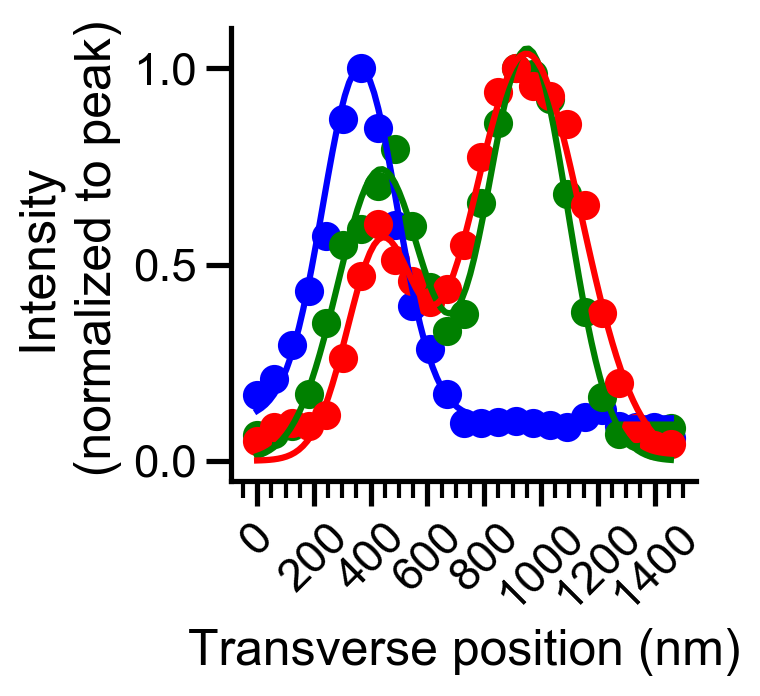

In [4]:
#Code for plotting Line Profiles for exDendriteToSoma

syn_fn = 'E:/MiRiEx/figures/fig 3/plotLineProfile/ex_DendriteToSoma.csv'
with open(syn_fn, 'r', encoding='utf-8-sig') as f: 
    lineData = np.genfromtxt(f, dtype=float, delimiter=',')

post_x1 = lineData[:,0];
post_y1 = lineData[:,1];
post_x2 = lineData[:,2];
post_y2 = lineData[:,3];

pre_x1 = lineData[:,4];
pre_y1 = lineData[:,5];
pre_x2 = lineData[:,6];
pre_y2 = lineData[:,7];

Bb_x1 = lineData[:,8]
Bb_y1 = lineData[:,9]
Bb_x2 = lineData[:,10]
Bb_y2 = lineData[:,11]

post_y1_max = np.nanmax(post_y1)
post_y2_max = np.nanmax(post_y2)
pre_y1_max = np.nanmax(pre_y1)
pre_y2_max = np.nanmax(pre_y2)
Bb_y1_max = np.nanmax(Bb_y1)
Bb_y2_max = np.nanmax(Bb_y2)

#normalize data
for i in range(0,len(post_y1)):
    post_y1[i] = post_y1[i]/post_y1_max
    pre_y1[i] = pre_y1[i]/pre_y1_max
    Bb_y1[i] = Bb_y1[i]/Bb_y1_max

for i in range(0,len(post_y2)):
    post_y2[i] = post_y2[i]/post_y2_max
    pre_y2[i] = pre_y2[i]/pre_y2_max
    Bb_y2[i] = Bb_y2[i]/Bb_y2_max

Bb_y2 = Bb_y2[np.logical_not(np.isnan(Bb_y2))]
Bb_x2 = Bb_x2[np.logical_not(np.isnan(Bb_x2))]

pre_y2 = pre_y2[np.logical_not(np.isnan(pre_y2))]
pre_x2 = pre_x2[np.logical_not(np.isnan(pre_x2))]


popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, Bb_x2, Bb_y2, p0=[1, 1.5, .5, .7, 3, .5])
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
gauss_peak_1 = _1gaussian(Bb_x2, *pars_1)
gauss_peak_2 = _1gaussian(Bb_x2, *pars_2)
twoGaussFit_1 = _2gaussian(Bb_x1,*popt_2gauss)

popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, pre_x2, pre_y2, p0=[1, 1.5, .5, .7, 3, .5])
twoGaussFit_2 = _2gaussian(pre_x1,*popt_2gauss)




sns.set_context('talk')
fig, ax = plt.subplots()

ax.plot(post_x1*300,post_y1, c = 'Blue')
ax.scatter(post_x2*300,post_y2, c = 'Blue', marker = 'o')

#ax.plot(pre_x1*300,pre_y1, c = 'gold')
ax.scatter(pre_x2*300,pre_y2, c = 'Green', marker = 'o')
ax.plot(pre_x1*300, twoGaussFit_2, c= 'green')

#ax.plot(Bb_x1*300,Bb_y1, c = 'blue')
ax.plot(Bb_x1*300, twoGaussFit_1, c= 'Red')

ax.scatter(Bb_x2*300,Bb_y2, c = 'Red', marker = 'o')

ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xlim(200,800)
ax.set_xlabel('Transverse position (nm)')
ax.set_ylabel('Intensity \n (normalized to peak)')
plt.xticks(rotation=45)

out_fn = 'E:/MiRiEx/figures/fig 3/plotLineProfile/ex_DendriteToSoma.svg'
#plt.savefig(out_fn, dpi=300)

print('Blue max is at ' + str(post_x1[np.argmax(post_y1)]*300))
print('Red Max is at ' + str(Bb_x1[np.argmax(twoGaussFit_1)]*300))
print('Green Max is at ' + str(pre_x1[np.argmax(twoGaussFit_2)]*300))

#plt.grid(which = 'minor', linestyle = '--', linewidth = 0.5)

Post Synaptic Max is at 441.65700000000004
Bb Max is at 487.665
Pre Synaptic Max is at 561.273


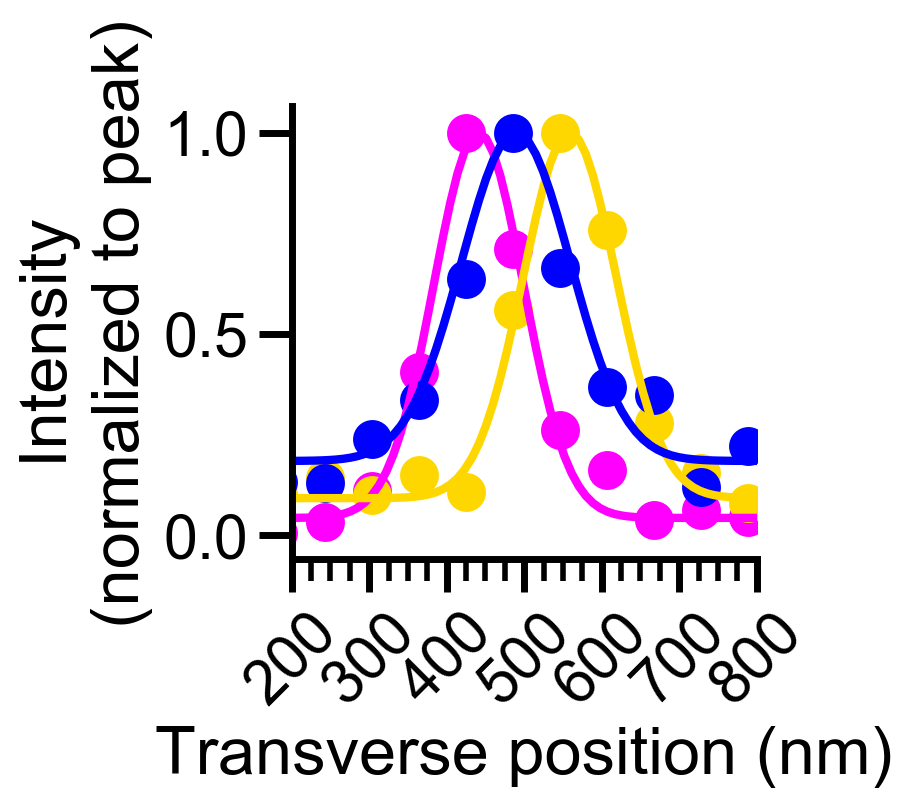

In [5]:
#Code for plotting Line Profiles for exDendriteToSoma

syn_fn = 'E:/MiRiEx/figures/fig 3/plotLineProfile/Ex2syn.csv'
with open(syn_fn, 'r', encoding='utf-8-sig') as f: 
    lineData = np.genfromtxt(f, dtype=float, delimiter=',')

post_x1 = lineData[:,0];
post_y1 = lineData[:,1];
post_x2 = lineData[:,2];
post_y2 = lineData[:,3];

pre_x1 = lineData[:,4];
pre_y1 = lineData[:,5];
pre_x2 = lineData[:,6];
pre_y2 = lineData[:,7];

Bb_x1 = lineData[:,8]
Bb_y1 = lineData[:,9]
Bb_x2 = lineData[:,10]
Bb_y2 = lineData[:,11]

post_y1_max = np.nanmax(post_y1)
post_y2_max = np.nanmax(post_y2)
pre_y1_max = np.nanmax(pre_y1)
pre_y2_max = np.nanmax(pre_y2)
Bb_y1_max = np.nanmax(Bb_y1)
Bb_y2_max = np.nanmax(Bb_y2)

#normalize data
for i in range(0,len(post_y1)):
    post_y1[i] = post_y1[i]/post_y1_max
    pre_y1[i] = pre_y1[i]/pre_y1_max
    Bb_y1[i] = Bb_y1[i]/Bb_y1_max

for i in range(0,len(post_y2)):
    post_y2[i] = post_y2[i]/post_y2_max
    pre_y2[i] = pre_y2[i]/pre_y2_max
    Bb_y2[i] = Bb_y2[i]/Bb_y2_max

sns.set_context('poster')
fig, ax = plt.subplots()

ax.plot(post_x1*300,post_y1, c = 'magenta')
ax.scatter(post_x2*300,post_y2, c = 'magenta', marker = 'o')

ax.plot(pre_x1*300,pre_y1, c = 'gold')
ax.scatter(pre_x2*300,pre_y2, c = 'gold', marker = 'o')
#ax.plot(pre_x1*300, twoGaussFit_2, c= 'green')

ax.plot(Bb_x1*300,Bb_y1, c = 'blue')
ax.scatter(Bb_x2*300,Bb_y2, c = 'blue', marker = 'o')

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(25))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(200,800)
ax.set_xlabel('Transverse position (nm)')
ax.set_ylabel('Intensity \n (normalized to peak)')
plt.xticks(rotation=45)

out_fn = 'E:/MiRiEx/figures/fig 3/plotLineProfile/Ex2syn.svg'
#plt.savefig(out_fn, dpi=300)


print('Post Synaptic Max is at ' + str(post_x1[np.argmax(post_y1)]*300))
print('Bb Max is at ' + str(Bb_x1[np.argmax(Bb_y1)]*300))
print('Pre Synaptic Max is at ' + str(pre_x1[np.argmax(pre_y1)]*300))

#plt.grid(which = 'minor', linestyle = '--', linewidth = 0.5)

Post Synaptic Max is at 499.32000000000005
Bb Max is at 445.33799999999997
Pre Synaptic Max is at 634.269


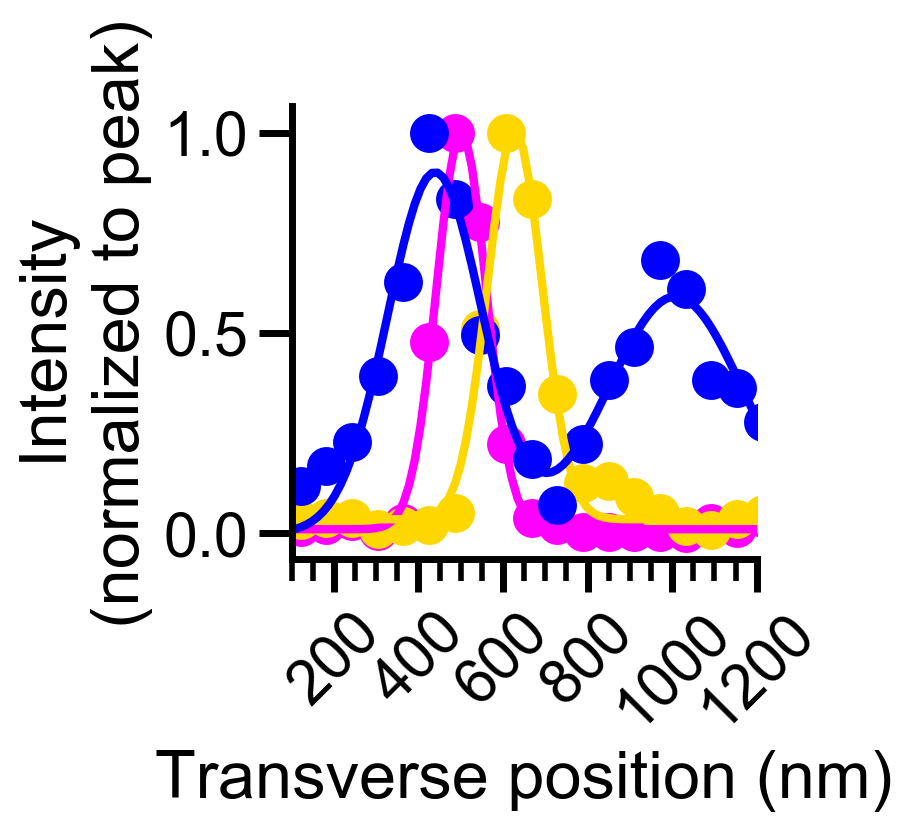

In [6]:
#Code for plotting Line Profiles for exDendriteToSoma

syn_fn = 'E:/MiRiEx/figures/fig 3/plotLineProfile/ex_falsePositive.csv'
with open(syn_fn, 'r', encoding='utf-8-sig') as f: 
    lineData = np.genfromtxt(f, dtype=float, delimiter=',')

post_x1 = lineData[:,0];
post_y1 = lineData[:,1];
post_x2 = lineData[:,2];
post_y2 = lineData[:,3];

pre_x1 = lineData[:,4];
pre_y1 = lineData[:,5];
pre_x2 = lineData[:,6];
pre_y2 = lineData[:,7];

Bb_x1 = lineData[:,8]
Bb_y1 = lineData[:,9]
Bb_x2 = lineData[:,10]
Bb_y2 = lineData[:,11]

post_y1_max = np.nanmax(post_y1)
post_y2_max = np.nanmax(post_y2)
pre_y1_max = np.nanmax(pre_y1)
pre_y2_max = np.nanmax(pre_y2)
Bb_y1_max = np.nanmax(Bb_y1)
Bb_y2_max = np.nanmax(Bb_y2)

#normalize data
for i in range(0,len(post_y1)):
    post_y1[i] = post_y1[i]/post_y1_max
    pre_y1[i] = pre_y1[i]/pre_y1_max
    Bb_y1[i] = Bb_y1[i]/Bb_y1_max

for i in range(0,len(post_y2)):
    post_y2[i] = post_y2[i]/post_y2_max
    pre_y2[i] = pre_y2[i]/pre_y2_max
    Bb_y2[i] = Bb_y2[i]/Bb_y2_max


Bb_y2 = Bb_y2[np.logical_not(np.isnan(Bb_y2))]
Bb_x2 = Bb_x2[np.logical_not(np.isnan(Bb_x2))]

popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, Bb_x2, Bb_y2, p0=[1, 1.5, .5, .7, 3, .5])
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
gauss_peak_1 = _1gaussian(Bb_x2, *pars_1)
gauss_peak_2 = _1gaussian(Bb_x2, *pars_2)
twoGaussFit_1 = _2gaussian(Bb_x1,*popt_2gauss)
    
sns.set_context('poster')
fig, ax = plt.subplots()

ax.plot(post_x1*300,post_y1, c = 'magenta')
ax.scatter(post_x2*300,post_y2, c = 'magenta', marker = 'o')

ax.plot(pre_x1*300,pre_y1, c = 'gold')
ax.scatter(pre_x2*300,pre_y2, c = 'gold', marker = 'o')
#ax.plot(pre_x1*300, twoGaussFit_2, c= 'green')

#ax.plot(Bb_x1*300,Bb_y1, c = 'blue')
ax.scatter(Bb_x2*300,Bb_y2, c = 'blue', marker = 'o')
ax.plot(Bb_x1*300, twoGaussFit_1, c= 'blue')

ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(100,1200)
ax.set_xlabel('Transverse position (nm)')
ax.set_ylabel('Intensity \n (normalized to peak)')
plt.xticks(rotation=45)

out_fn = 'E:/MiRiEx/figures/fig 3/plotLineProfile/ex_falsePositive.svg'
#plt.savefig(out_fn, dpi=300)

print('Post Synaptic Max is at ' + str(post_x1[np.argmax(post_y1)]*300))
print('Bb Max is at ' + str(Bb_x1[np.argmax(Bb_y1)]*300))
print('Pre Synaptic Max is at ' + str(pre_x1[np.argmax(pre_y1)]*300))